In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


9


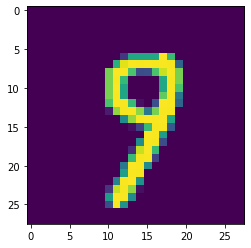

In [12]:
plt.imshow(x_train[1250])
print(y_train[1250])

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


2021-09-28 23:23:59.885686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 23:23:59.889843: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 23:23:59.890153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-28 23:23:59.890930: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=1024)#, callbacks=[callback])

2021-09-28 23:24:00.506533: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
40/40 [==============================] - 1s 5ms/step - loss: 0.5319 - accuracy: 0.8357 - val_loss: 0.2179 - val_accuracy: 0.9349
Epoch 2/150
 1/40 [..............................] - ETA: 0s - loss: 0.2291 - accuracy: 0.9277

2021-09-28 23:24:01.068718: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


40/40 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9387 - val_loss: 0.1636 - val_accuracy: 0.9515
Epoch 3/150
40/40 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9536 - val_loss: 0.1487 - val_accuracy: 0.9556
Epoch 4/150
40/40 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9603 - val_loss: 0.1249 - val_accuracy: 0.9626
Epoch 5/150
40/40 [==============================] - 0s 2ms/step - loss: 0.1097 - accuracy: 0.9664 - val_loss: 0.1178 - val_accuracy: 0.9661
Epoch 6/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9704 - val_loss: 0.1170 - val_accuracy: 0.9665
Epoch 7/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9750 - val_loss: 0.1081 - val_accuracy: 0.9676
Epoch 8/150
40/40 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.9781 - val_loss: 0.1026 - val_accuracy: 0.9705
Epoch 9/150
40/40 [======

Epoch 60/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.1660 - val_accuracy: 0.9733
Epoch 61/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.1642 - val_accuracy: 0.9735
Epoch 62/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.1659 - val_accuracy: 0.9730
Epoch 63/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.1612 - val_accuracy: 0.9733
Epoch 64/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.1754 - val_accuracy: 0.9719
Epoch 65/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9924 - val_loss: 0.1733 - val_accuracy: 0.9731
Epoch 66/150
40/40 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9931 - val_loss: 0.1766 - val_accuracy: 0.9732
Epoch 

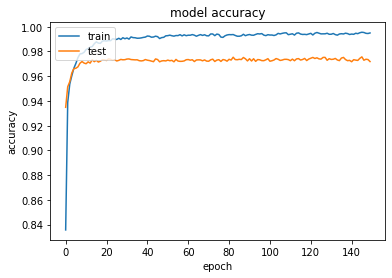

In [7]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


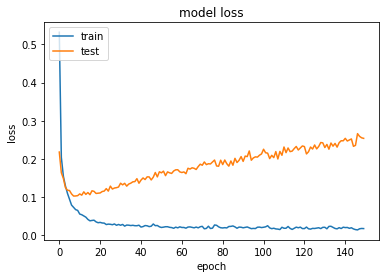

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.2377 - accuracy: 0.9761


[0.23771002888679504, 0.9761000275611877]